In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
pd.set_option('display.max_columns', None)

In [93]:
def parse_results(filename:str, mv:bool = False) -> pd.DataFrame:
    "Parse results text filename and creates a pandas DataFrame"
    
    data = defaultdict(list)
    with open(filename) as file:
        for line in file:
            if line == '\n' or line[:4] == 'mse_':
                continue
            if line[:3] == 'mse':
                result = line.replace(" ", "").split(',')
                data['MSE'].append(round(float(result[0].split(':')[1]),8))
                data['MAE'].append(round(float(result[1].split(':')[1]),8))
                if not mv:
                    data['RMSE'].append(round(float(result[2].split(':')[1]),8))
                    data['MAPE'].append(round(float(result[3].split(':')[1]),8))
                    data['MSPE'].append(round(float(result[4].split(':')[1]),8))
                    data['RSE'].append(round(float(result[5].split(':')[1]),8))
                    data['R2'].append(round(float(result[6].split(':')[1]),8))
                    data['train_time'].append(round(float(result[7].split(':')[1]),8))
                    data['test_time'].append(round(float(result[8].split(':')[1]),8))
                    if len(result) > 9:
                        data['epochs'].append(round(float(result[9].split(':')[1]),8))
                    else:
                        data['epochs'].append(1)        
            else:
                attributes = line.split(sep='_')
#                 print(attributes)
                data['model'].append(attributes[0])
                data['lookback'].append(int(attributes[1].split('-')[1]))
                data['future'].append(int(attributes[3].split('-')[1]))
                data['pos'].append(attributes[5].split('-')[1])
                data['val'].append(attributes[6].split('-')[1])
                data['temp'].append(attributes[7].split('-')[1].split(' ')[0])

    return pd.DataFrame.from_dict(data)

def parse_lstms(filename:str) -> pd.DataFrame:
    "Parse results text filename and creates a pandas DataFrame"
    
    data = defaultdict(list)
    with open(filename) as file:
        for line in file:
            if line == '\n':
                continue
            if line[:3] == 'mse':
                result = line.replace(" ", "").split(',')
                data['MSE'].append(round(float(result[0].split(':')[1]),8))
                data['MAE'].append(round(float(result[1].split(':')[1]),8))
                data['RMSE'].append(round(float(result[2].split(':')[1]),8))
                data['MAPE'].append(round(float(result[3].split(':')[1]),8))
                data['R2'].append(round(float(result[4].split(':')[1]),8))
            else:
                attributes = line.split(sep='_')
                model = attributes[0]
                data['lookback'].append(int(attributes[2].split('-')[1]))
                data['future'].append(int(attributes[3].split('-')[1]))

    return pd.DataFrame.from_dict(data)

def slice_and_dice(formers:pd.DataFrame, lstms: pd.DataFrame) -> pd.DataFrame:
    """."""
    transformer, autoformer, informer = \
    formers[formers['model'] == 'Transformer'].drop('model', axis = 1), \
    formers[formers['model'] == 'Autoformer'].drop('model', axis = 1), \
    formers[formers['model'] == 'Informer'].drop('model', axis = 1),
    df = autoformer.merge(informer, how = "left", on=["lookback", "future", "pos", "val", "temp"], \
                              suffixes=('-Autoformer', '-Informer'))\
                       .merge(transformer, how = "left", on=["lookback", "future", "pos", "val", "temp"], \
                             suffixes=('_ello', '-Transformer'))\
                       .merge(lstms, how="left",  on=["lookback", "future"], suffixes=('-Transformer', '-LSTM'))

    return df

# def compare_uni_multi(uni: pd.DataFrame, mv: pd.DataFrame) -> pd.DataFrame:
    

In [94]:
## multiple input multiplt output default embeddings##
mv_formers_mo = parse_results('multivariate/multiple_output/all_multivariate_result.txt', True).\
                drop_duplicates(subset=['model', 'lookback', 'future', 'pos','val','temp'],keep = 'last')
mv_lstms_mo = parse_lstms('multivariate/multiple_output/result-lstm-multivariate-more-feature-scenario3.txt').\
                drop_duplicates(subset=['lookback', 'future'], keep = 'last')
df_mv_mo = slice_and_dice(mv_formers_mo, mv_lstms_mo)

In [95]:
df_mv_mo = df_mv_mo[['lookback', 'future', 'MSE-Informer', 'MAE-Informer', 'MSE-Transformer', 'MAE-Transformer',\
                    'MSE-Autoformer', 'MAE-Autoformer', 'MSE-LSTM', 'MAE-LSTM']]
df_mv_mo

,lookback,future,MSE-Informer,MAE-Informer,MSE-Transformer,MAE-Transformer,MSE-Autoformer,MAE-Autoformer,MSE-LSTM,MAE-LSTM
0,24,1,1.181905,0.671228,1.148926,0.739565,0.123713,0.145650,0.132070,0.186264
1,24,12,1.154781,0.731331,1.153394,0.721076,0.147956,0.155878,0.196064,0.254558
2,24,24,1.165637,0.698061,1.159051,0.708572,0.167856,0.175990,0.277043,0.311878
3,24,96,1.188545,0.693898,1.164382,0.719267,0.242026,0.253801,0.298898,0.379192
4,24,192,1.368412,0.738943,1.249327,0.707992,0.242527,0.274372,0.433304,0.512907
5,24,336,1.470878,0.702463,1.325967,0.662182,0.289275,0.331756,0.552791,0.607772
6,48,1,1.163258,0.706107,1.147899,0.747796,0.147674,0.168907,0.135187,0.182714
7,48,12,1.156187,0.726761,1.150988,0.729260,0.165983,0.182364,0.191547,0.239523
8,48,24,1.160190,0.736293,1.155363,0.722387,0.182449,0.195666,0.269593,0.301951
9,48,96,1.201365,0.725676,1.169840,0.704501,0.235632,0.256082,0.290313,0.372378


In [96]:
## Univariate ##
uv_formers = parse_results('univariate/formers-original-data.txt').\
                drop_duplicates(subset=['model', 'lookback', 'future', 'pos','val','temp'], keep = 'last')
uv_formers['time_per_epoch'] = uv_formers['train_time']/uv_formers['epochs']
uv_lstms = parse_lstms('archive/result-lstm-original-data.txt').\
                drop_duplicates(subset=['lookback', 'future'], keep = 'first')

## multiple input OHLC -> single output##
mv_formers = parse_results('multivariate/formers_multivariate_result_latest.txt', True).\
                drop_duplicates(subset=['model', 'lookback', 'future', 'pos','val','temp'],keep = 'last')
mv_lstms = parse_lstms('multivariate/result-lstm-multivariate.txt').\
                drop_duplicates(subset=['lookback', 'future'], keep = 'last')


## multiple input OHLC and Moving Averages -> single output##
mv_formers_ma = parse_results('multivariate/formers_multivariate_result_more_features.txt', True).\
                drop_duplicates(subset=['model', 'lookback', 'future', 'pos','val','temp'],keep = 'last')
mv_lstms_ma = parse_lstms('multivariate/result-lstm-multivariate-more-features.txt').\
                drop_duplicates(subset=['lookback', 'future'], keep = 'last')

##
df_seq_len = parse_results('understanding_seq_len.txt', True)

df_uv = slice_and_dice(uv_formers, uv_lstms)
df_mv = slice_and_dice(mv_formers, mv_lstms)
df_mv_ma = slice_and_dice(mv_formers_ma, mv_lstms_ma)

## Multiple Input - UniVariate ##

In [97]:
# pd.set_option('display.expand_frame_repr', False)
# # model = 'Autoformer'
# model = 'Informer'
# # model = 'Informer'
# mv_frame = mv_formers_ma.copy(deep=True)
# df_uni_mv = uv_formers[["model","lookback", "future", "pos", "val", "temp", "MSE", "MAE"]].\
#             merge(mv_frame, how = "left", on=["model","lookback", "future", "pos", "val", "temp"], \
#                               suffixes=('-Uni', '-multi'))
# df_uni_mv = df_uni_mv.dropna()# lookback = 6
# if model == 'Transformer':
#     pos, val, temp = 'True', 'False', 'False'
# elif model == 'Informer':
#     pos, val, temp = 'True', 'True', 'True'
# elif model == 'Autoformer':
#     pos, val, temp = 'False', 'True', 'True'
 
# for lookback in [24, 48, 96, 168, 336]:   
#     try:
#         result_df = df_uni_mv[(df_uni_mv['model'] == model)\
#                   & (df_uni_mv['lookback'] == lookback)\
#                   & (df_uni_mv['pos'] == pos)\
#                   & (df_uni_mv['val'] == val)\
#                   & (df_uni_mv['temp'] == temp)]
# #         result_df['improvement'] = (result_df['MAE-Uni'] - result_df['MAE-multi'])*100/result_df['MAE-Uni']
# #         result_df *= 10
# #         print(len(result_df))
# #         print("-------")
#         if len(result_df):
#             ax = result_df.plot.bar(x='future', y=['MAE-Uni','MAE-multi'],figsize=(10,5))
#             ax.set_title(model + "- lookback "+ str(lookback) )
#     except Exception as e:
#         print(e)

## Time comparison ##

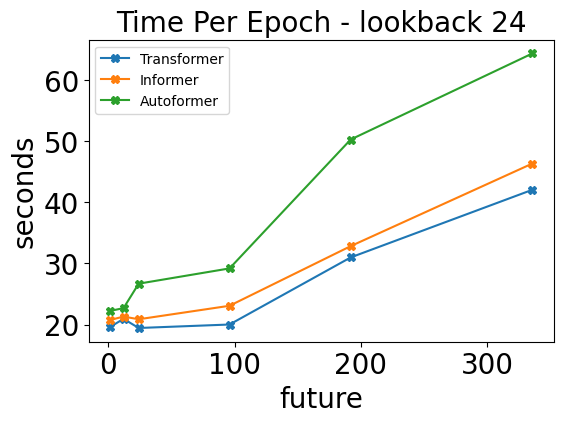

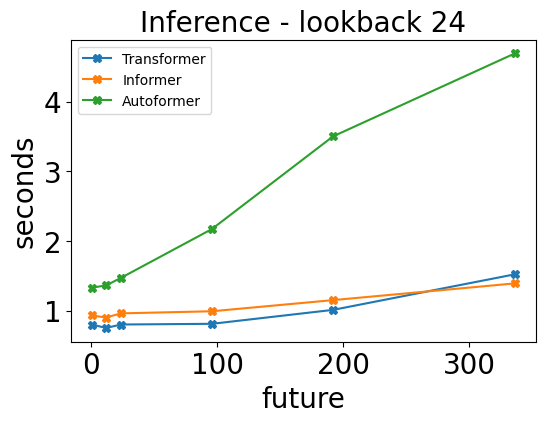

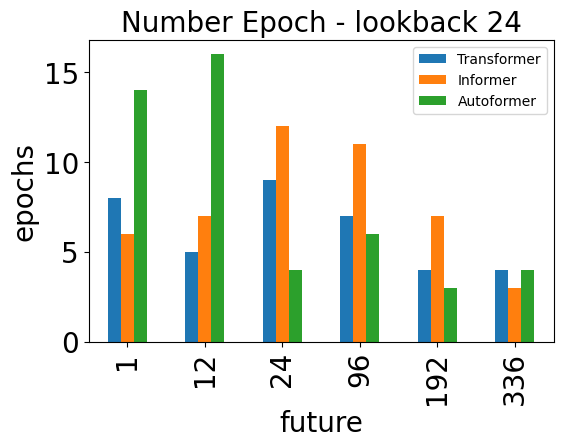

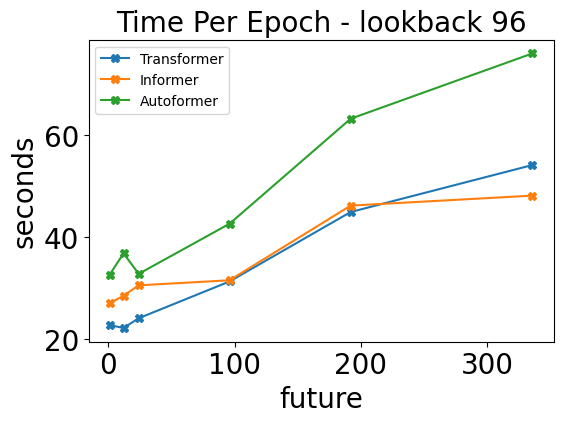

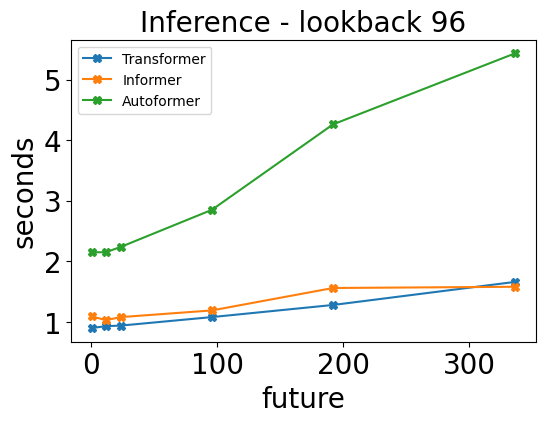

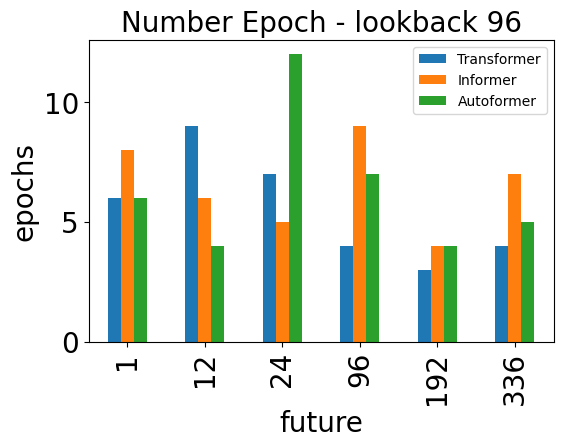

In [98]:
pd.set_option('display.expand_frame_repr', True)
plt.rcParams["figure.dpi"] = 100
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# for lookback in [6, 12, 24, 48, 72, 96, 120, 144, 168, 192, 336, 504, 672,720]:
for lookback in [24, 96]:
    columns_time = ['test_time','test_time-Informer','test_time-Autoformer']
    columns_epoch = ['epochs','epochs-Informer','epochs-Autoformer']
    columns = ['time_per_epoch','time_per_epoch-Informer','time_per_epoch-Autoformer']
    time_df = df_uv[['lookback', 'future', 'pos', 'val', 'temp',\
                      'time_per_epoch-Autoformer','time_per_epoch-Informer','time_per_epoch',\
                      'test_time-Autoformer','test_time-Informer','test_time',\
                      'train_time-Autoformer','train_time-Informer','train_time',\
                      'epochs-Autoformer','epochs-Informer','epochs']]
    time_df = time_df[time_df['epochs']>2]
    ## Informer ##
    time_inf = time_df[(time_df['lookback'] == lookback) & (time_df['pos'] == 'True')\
            & (time_df['val'] == 'True') & (time_df['temp'] == 'True')]\
            [['lookback', 'future', 'time_per_epoch-Informer','epochs-Informer','test_time-Informer']]
    ## Transformer ##
    time_tra = time_df[(time_df['lookback'] == lookback) & (time_df['pos'] == 'True')\
            & (time_df['val'] == 'False') & (time_df['temp'] == 'False')]\
            [['lookback', 'future', 'time_per_epoch','epochs','test_time']]
    ## Autoformer ##
    time_aut = time_df[(time_df['lookback'] == lookback) & (time_df['pos'] == 'False')\
            & (time_df['val'] == 'True') & (time_df['temp'] == 'True')]\
            [['lookback', 'future', 'time_per_epoch-Autoformer','epochs-Autoformer','test_time-Autoformer']]
    time_formers = time_inf.merge(time_tra, how = "left", on=["lookback", "future"],suffixes=('-Autoformer', '-Informer'))\
                 .merge(time_aut, how = "left", on=["lookback", "future"],suffixes=('_ello', '-Transformer'))
    # time_formers
    time_formers = time_formers.round(2)
    time_formers = time_formers[time_formers['future']<=336]
#     print(time_formers)
    ax = time_formers.plot(x='future', y=columns,style='X-')
    ax.set_ylabel('seconds')
    ax.legend(['Transformer','Informer','Autoformer'])
    ax.set_title('Time Per Epoch - lookback ' + str(lookback))
    
    ax = time_formers.plot(x='future', y=columns_time,style='X-')
    ax.set_ylabel('seconds')
    ax.legend(['Transformer','Informer','Autoformer'])
    ax.set_title('Inference - lookback ' + str(lookback))
    
    ax = time_formers.plot.bar(x='future', y=columns_epoch,style='X-')
    ax.set_ylabel('epochs')
    ax.legend(['Transformer','Informer','Autoformer'])
    ax.set_title('Number Epoch - lookback ' + str(lookback))
#     ax = time_formers.plot(x='future', y=columns_epoch,style='X-')
#     ax.set_ylabel('Epochs')
#     ax.bar_label(ax.containers[0], rotation = 45)
#     ax.bar_label(ax.containers[1], rotation = 45)
#     ax.bar_label(ax.containers[2], rotation = 45)
#     ax.legend(['Transformer','Informer','Autoformer'])
#     ax.set_title('Epoch - lookback ' + str(lookback))



#     ax.bar_label(ax.containers[0], rotation = 45)
#     ax.bar_label(ax.containers[1], rotation = 45)
#     ax.bar_label(ax.containers[2], rotation = 45)

## SHOW DIFFERENT EMBEDDINGS DATAFRAME ##

In [99]:
# pd.set_option('display.expand_frame_repr', True)
# def show_best_parameters_for_model(df, model = 'Transformer'):
#     df = df.copy(deep=True)
#     for lookback in [24, 48, 96, 336, 720]:
# #     for lookback in [96]:
#         for future in [1, 12, 24, 96, 192, 336, 720]:
#             try:
#                 df_ = df[(df['lookback'] == lookback) & (df['future'] == future)]\
#                       [['lookback','future','pos','val','temp','MAE-' + model]].reset_index(drop=True)
#                 res = df_.iloc[df_['MAE-' + model].idxmin()]
# #                 df_['MAE-' + model] *= 10
#                 print(df_)
#                 print(list(res))
#                 print("=============")
#             except Exception as e:
#                 print('Lookback {} and future {} not found'.format(lookback, future))


# # show_best_parameters_for_model(df_uv, model = 'Transformer')

## DEFAULT EMBEDDINGS SHOW DATAFRAME ##

In [100]:
def show_by_mse_mae(df_, *args, x_axis = 'future'):
    """."""
    x_axis = x_axis
    df_ = df_.copy(deep=True)
    
    if x_axis ==  'lookback':
        frame_by = 'future'
        loopby = [1, 12, 24, 96, 192, 336, 720]
    elif x_axis == 'future':
        frame_by = 'lookback'
#         loopby = [24, 48, 72, 96, 120, 144, 168, 336, 720]
        loopby = [24, 48, 96, 336]
        

    for i in loopby:
        autoformer= df_[(df_[frame_by] == i) & (df_['pos'] == 'False') & (df_['temp'] == 'True')\
                    & (df_['val'] == 'True')][['lookback','future','MSE-Autoformer', 'MAE-Autoformer','MSE-LSTM',\
                                                  'MAE-LSTM']]
        informer = df_[(df_[frame_by] == i) & (df_['pos'] == 'True') & (df_['temp'] == 'True')\
                     & (df_['val'] == 'True')][['lookback','future','MSE-Informer', 'MAE-Informer']]
        transformer = df_[(df_[frame_by] == i) & (df_['pos'] == 'True') & (df_['temp'] == 'False')\
                     & (df_['val'] == 'False')][['lookback','future','MSE-Transformer', 'MAE-Transformer']]
        df_merge = informer.merge(transformer, how = "left", on=["lookback", "future"], suffixes=('_Inf', '_Tra'))\
                   .merge(autoformer, how = "left", on=["lookback", "future"], suffixes=('_ello', '_auto'))
#         df_merge *= 10
        df_merge = df_merge.round(5)
        print("lookback ", i)
        df_merge = df_merge.drop(columns=['lookback'])
        df_merge = df_merge.round(5)
        print(df_merge.to_string(index=False))
#         print("=========")

show_by_mse_mae(df_mv_ma, x_axis='future')

lookback  24
 future  MSE-Informer  MAE-Informer  MSE-Transformer  MAE-Transformer  MSE-Autoformer  MAE-Autoformer  MSE-LSTM  MAE-LSTM
      1       0.00722       0.05791          0.00234          0.03790         0.00131         0.02479   0.00799   0.07043
     12       0.02510       0.12016          0.00738          0.06178         0.00544         0.04974   0.05518   0.20645
     24       0.03297       0.14666          0.01630          0.10075         0.01039         0.06973   0.06636   0.22716
     96       0.07597       0.21703          0.08092          0.23158         0.03107         0.12877   0.10312   0.28071
    192       0.23505       0.40432          0.26964          0.42045         0.05399         0.17543   0.29209   0.47659
    336       0.36310       0.49676          0.34774          0.50455         0.09170         0.23696   0.32330   0.47478
lookback  48
 future  MSE-Informer  MAE-Informer  MSE-Transformer  MAE-Transformer  MSE-Autoformer  MAE-Autoformer  MSE-LSTM  MAE-LST

## BEST EMBEDDINGS SHOW DATAFRAME ##

In [55]:
pd.set_option('display.expand_frame_repr', False)
def show_by_mse_mae(df_):
    """."""
    df_ = df_.copy(deep=True)
    data = defaultdict(list)
    for lookback in [24, 48, 72, 96, 336, 720]:
        for future in [1, 12, 24, 96, 192, 336, 720]:
            former= df_[(df_['lookback'] == lookback) & (df_['future'] == future)]\
                        [['lookback','future','pos','val','temp','MSE-Autoformer', 'MAE-Autoformer',\
                          'MSE-Informer', 'MAE-Informer',\
                          'MSE-Transformer','MAE-Transformer']]
            data['lookback'].append(lookback)
            data['future'].append(future)
            data['MSE-Info'].append(former['MSE-Informer'].min())
            data['MAE-Info'].append(former['MAE-Informer'].min())
            data['MSE-Trans'].append(former['MSE-Transformer'].min())
            data['MAE-Trans'].append(former['MAE-Transformer'].min())
            data['MSE-Auto'].append(former['MSE-Autoformer'].min())
            data['MAE-Auto'].append(former['MAE-Autoformer'].min())
#             print(former)
#             print("------")
    return pd.DataFrame.from_dict(data)
return_df = show_by_mse_mae(df_mv_ma)
# return_df *= 10
print(return_df.to_string(index=False))

 lookback  future  MSE-Info  MAE-Info  MSE-Trans  MAE-Trans  MSE-Auto  MAE-Auto
       24       1  0.004675  0.054113   0.002052   0.033339  0.001313  0.024794
       24      12  0.006806  0.060006   0.006677   0.058884  0.004694  0.045573
       24      24  0.015588  0.094003   0.015435   0.096296  0.009391  0.065371
       24      96  0.070963  0.207507   0.035492   0.140452  0.029774  0.124870
       24     192  0.094496  0.243168   0.193753   0.338556  0.053348  0.174466
       24     336  0.322546  0.468153   0.311534   0.458677  0.090440  0.234584
       24     720       NaN       NaN        NaN        NaN       NaN       NaN
       48       1  0.014894  0.099702   0.003249   0.041671  0.001409  0.026097
       48      12  0.014377  0.092971   0.006081   0.056302  0.005762  0.053601
       48      24  0.015931  0.093191   0.017032   0.102944  0.009443  0.067727
       48      96  0.099587  0.248836   0.064180   0.201342  0.031913  0.130820
       48     192  0.264511  0.421636   

## SHOW EMBEDDING COMBINATIONS ##

In [56]:
def show_embeddings_comb(df_, columns, lookback_list):
    df_ = df_.copy(deep=True)
    loopby = [24, 48, 72, 96, 336, 720]

    for lookback in lookback_list:
        print(" "*40 + "============= LOOKBACK {} ==============".format(lookback))
        for pos in ["True", "False"]:
            for val in ["True", "False"]:
                for temp in ["True", "False"]:
                    if pos == "False" and val == "False" and temp == "False":
                        continue
                        
                    ax = df_[(df_['lookback'] == lookback) & (df_['pos'] == pos) & (df_['temp'] == temp)\
                             & (df_['val'] == val)]\
                         .plot.bar(x='future', y=['MAE-Transformer', 'MAE-Informer'], figsize=(15,5))
                    
#                     for y in range(0, len(columns)):
#                         ax.bar_label(ax.containers[y], rotation = 90)
                    
                    if pos == "False" and val == "True" and temp == "True":
                        ax.set_title("pos " + pos + ", Val " + val + ", Temp " + temp + " ==> Default embeddings for AutoFormer")
                    elif pos == "True" and val == "True" and temp == "True":
                        ax.set_title("pos " + pos + ", Val " + val + ", Temp " + temp + " ==> Default embeddings for InFormer")
                    else:
                        ax.set_title("pos " + pos + ", Val " + val + ", Temp " + temp) 
                    plt.show()
# show_embeddings_comb(df_org, columns, [96])

In [71]:
SMALL_SIZE = 20
MEDIUM_SIZE = 26
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def show_by_default_embeddings(df_, *args, x_axis = 'future', metric = 'mae'):
    """."""
    x_axis = x_axis
    df_ = df_.copy(deep=True)
    columns = list(args)
    
    if x_axis ==  'lookback':
        frame_by = 'future'
        loopby = [1, 12, 24, 96, 192, 336, 720]
    elif x_axis == 'future':
        frame_by = 'lookback'
#         loopby = [6, 12, 24, 48, 72, 96, 120, 144, 168, 192, 336, 504, 672,720]
        loopby = [24, 48, 96, 336]
        

    for i in loopby:
        autoformer= df_[(df_[frame_by] == i) & (df_['pos'] == 'False') & (df_['temp'] == 'True')\
                    & (df_['val'] == 'True')][['lookback','future',columns[2],columns[3]]]
        informer = df_[(df_[frame_by] == i) & (df_['pos'] == 'True') & (df_['temp'] == 'True')\
                     & (df_['val'] == 'True')][['lookback','future',columns[1]]]
        transformer = df_[(df_[frame_by] == i) & (df_['pos'] == 'True') & (df_['temp'] == 'False')\
                     & (df_['val'] == 'False')][['lookback','future',columns[0]]]
        df_merge = informer.merge(transformer, how = "left", on=["lookback", "future"], suffixes=('_Inf', '_Tra'))\
                   .merge(autoformer, how = "left", on=["lookback", "future"], suffixes=('_ello', '_auto'))
#         df_merge[columns] *= 10
        df_merge = df_merge.round(3)
#         print(df_merge)
#         print("=========")
        ax = df_merge.plot.bar(x=x_axis, y=['MAE-Transformer','MAE-LSTM'], figsize=(20,7))
#         for y in range(0, len(columns)):
#             ax.bar_label(ax.containers[y], rotation = 60)
        ax.set_title(frame_by.upper() + " "+ str(i))
        ax.set_ylabel(metric.upper())

        

def show(df_, *args, x_axis = 'lookback', pos='True', val='False', temp='False'):
    """."""
    x_axis = x_axis
    df_ = df_.copy(deep=True)
    columns = list(args) 
#     df_[columns] *= 100
    df_ = df_.round(2)
    
    if x_axis ==  'lookback':
        frame_by = 'future'
        loopby = [1, 12, 24, 96, 192, 336, 720]
    elif x_axis == 'future':
        frame_by = 'lookback'
        loopby = [6, 12, 24, 48, 72, 96, 120, 144, 168, 192, 336, 504, 672,720]

    for i in loopby:
        ax = df_[(df_[frame_by] == i) & (df_['pos'] == pos) & (df_['temp'] == temp) 
               & (df_['val'] == val)]\
              .plot.bar(x=x_axis, y=columns, figsize=(15,5))
        for y in range(0, len(columns)):
            ax.bar_label(ax.containers[y], rotation = 60)
        ax.set_title(frame_by.upper() + " "+ str(i))

        
def show_embeddings_comb(df_, columns, lookback_list):
    df_ = df_.copy(deep=True)
#     df_[columns] *= 100
#     df_ = df_.round(2)
    

    for lookback in lookback_list:
        print(" "*40 + "============= LOOKBACK {} ==============".format(lookback))
        for pos in ["True", "False"]:
            for val in ["True", "False"]:
                for temp in ["True", "False"]:
                    if pos == "False" and val == "False" and temp == "False":
                        continue
                        
                    ax = df_[(df_['lookback'] == lookback) & \
                             (df_['pos'] == pos) & (df_['temp'] == temp) & (df_['val'] == val)]\
                         .plot.bar(x='future', y=columns, figsize=(15,5))
                    
                    for y in range(0, len(columns)):
                        ax.bar_label(ax.containers[y], rotation = 90)
                    
                    if pos == "False" and val == "True" and temp == "True":
                        ax.set_title("pos " + pos + ", Val " + val + ", Temp " + temp + " ==> Default embeddings for AutoFormer")
                    elif pos == "True" and val == "True" and temp == "True":
                        ax.set_title("pos " + pos + ", Val " + val + ", Temp " + temp + " ==> Default embeddings for InFormer")
                    else:
                        ax.set_title("pos " + pos + ", Val " + val + ", Temp " + temp) 
                    plt.show()



Text(0, 0.5, 'MAE')

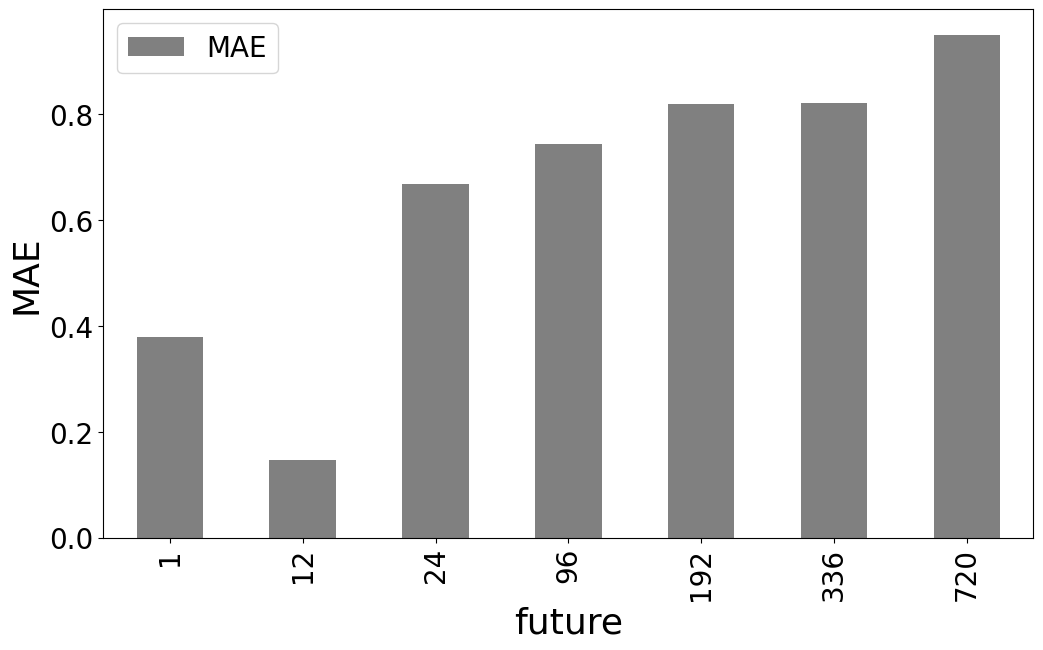

In [91]:
ax = uv_lstms[uv_lstms['lookback'] == 24].plot.bar(x='future',y='MAE', color='grey', figsize = (12,7))
plt.ylabel('MAE')


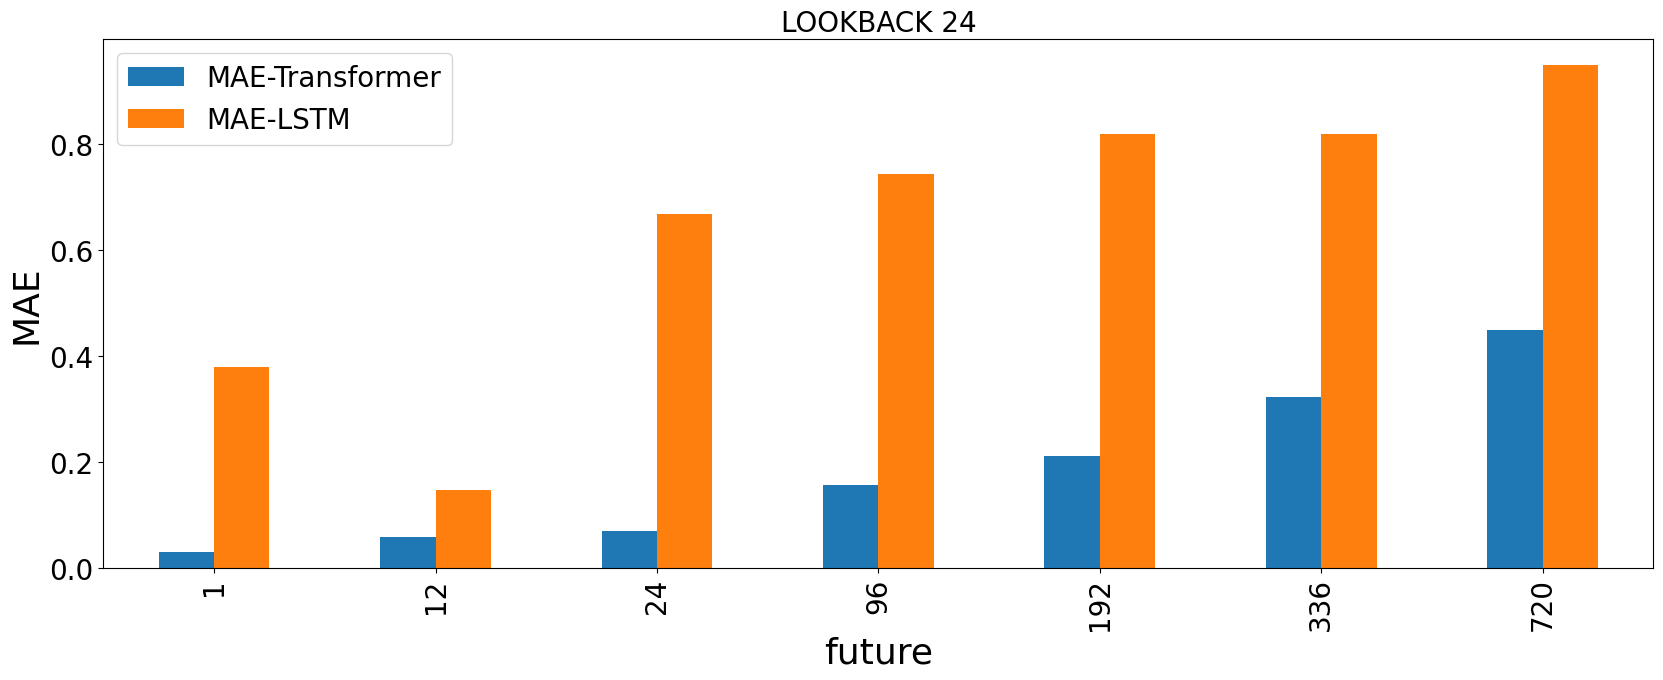

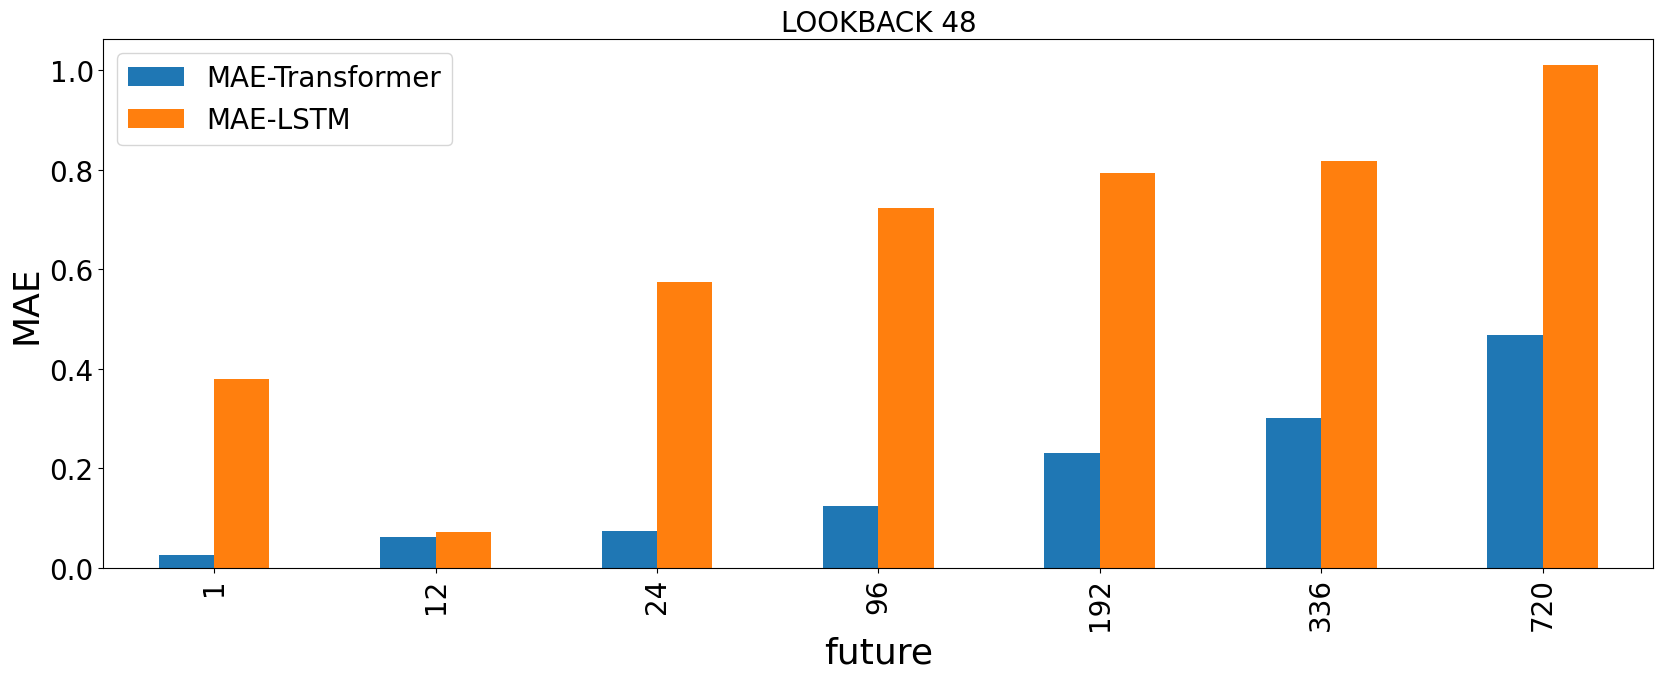

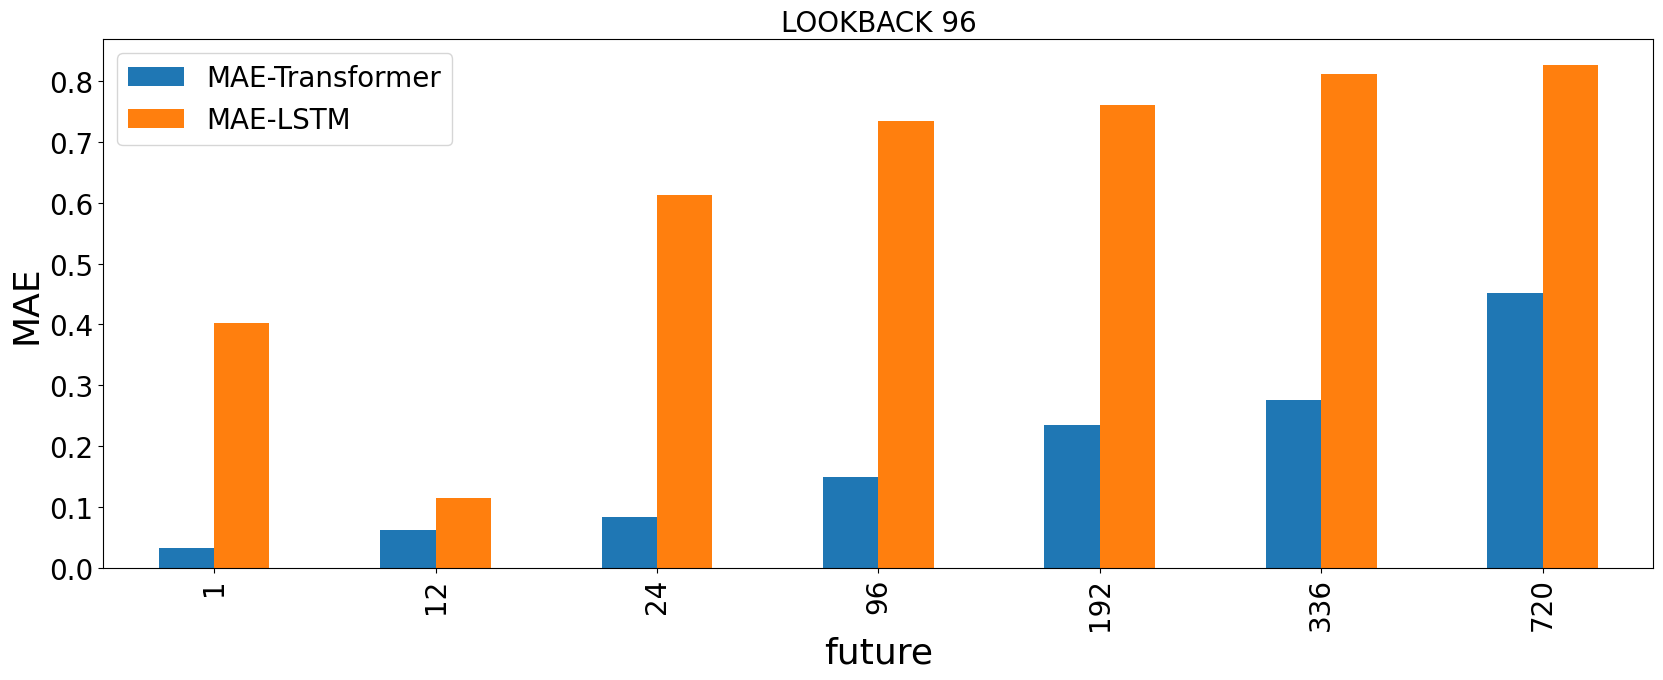

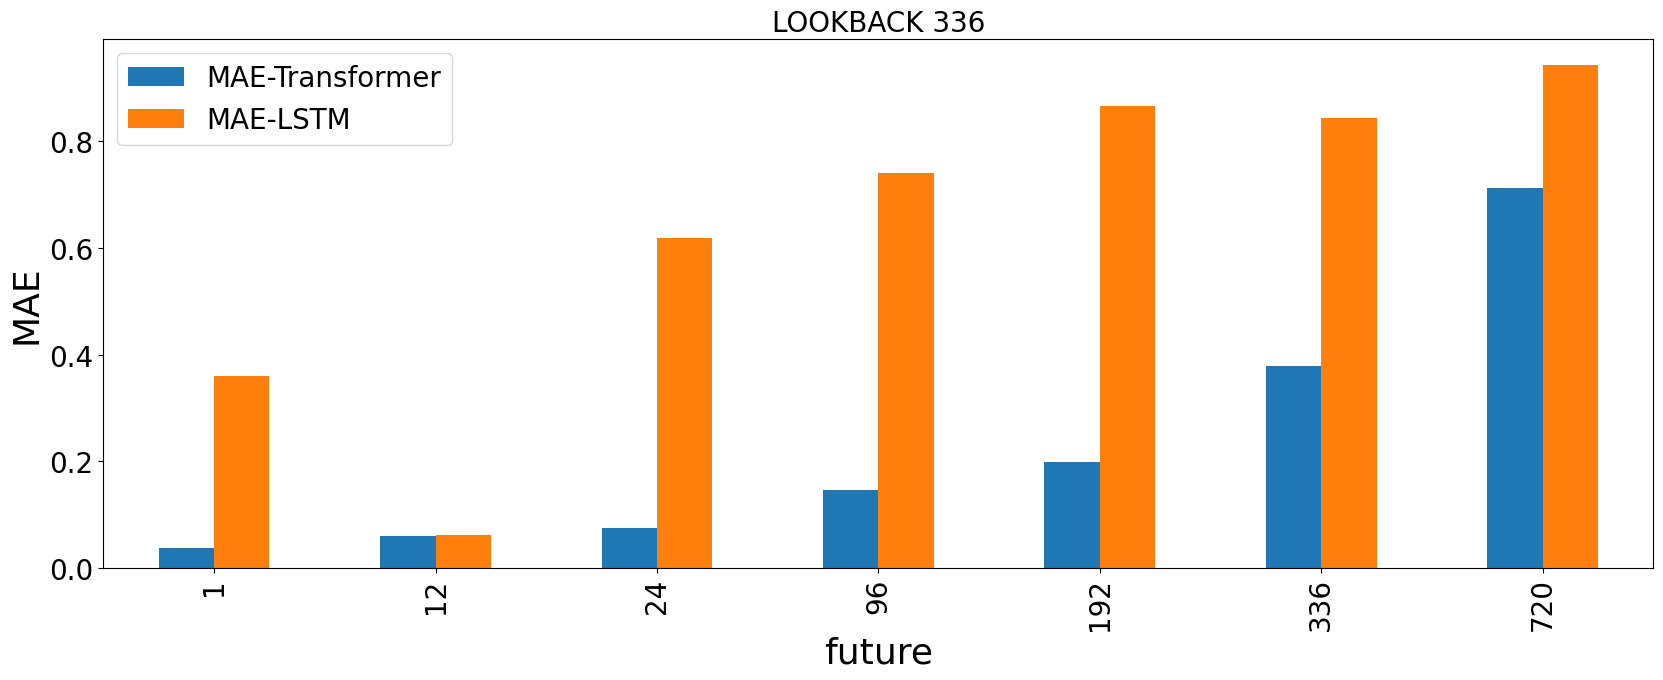

In [72]:
# plt.rcParams["figure.dpi"] = 140
pos, val, temp = 'True', 'False', 'True'
metric = 'MAE'
columns = list(map(lambda x: metric + x, ['-Transformer','-Informer', '-Autoformer', '-LSTM']))
show_by_default_embeddings(df_uv, *columns, x_axis='future', metric=metric)
# show(df_org, *columns, x_axis='future', pos = pos, val = val, temp = temp) 
# for lookback in [6, 12, 24, 48, 72, 96, 120, 144, 168, 192, 336, 504, 672,720]:
# show_embeddings_comb(df_org, columns, [96, 120])

In [13]:
# import torch
def subsequent_mask(size):
    "Mask out subsequent positions."
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
    return torch.from_numpy(subsequent_mask) == 0
plt.figure(figsize=(5,5))
plt.imshow(subsequent_mask(15)[0],cmap='gray')

NameError: name 'torch' is not defined

<Figure size 5000x5000 with 0 Axes>

In [ ]:
# df_org[(df_org['mae_LSTM'] < df_org['mae_Tra']) \
#        & (df_org['mae_LSTM'] < df_org['mae_Auto']) \
#        & (df_org['mae_LSTM'] < df_org['mae_Inf'])].\
#         sort_values(['lookback','future'])\
#      [['lookback', 'future', 'pos', 'val', 'temp','mae_Tra','mae_Auto','mae_Inf','mae_LSTM']]